In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Create pandas dataframe for the data
uberFinalData = pd.read_csv("C:\MOOC\Insofe\Big Data Module\End2End-CaseStudy2\Results\part-00000",
                            names=['hourOfDay','longitude','latitude','baseloc','clusterId'])

In [3]:
## Verify first 5 records
uberFinalData.head()

,hourOfDay,longitude,latitude,baseloc,clusterId
0,0,40.8039,-73.9678,B02764,2
1,0,40.7301,-74.0048,B02764,1
2,0,40.7488,-73.9873,B02764,6
3,0,40.7443,-73.9806,B02764,6
4,0,40.7415,-73.9988,B02764,1


In [4]:
## Verify column names
uberFinalData.columns.values.tolist()

['hourOfDay', 'longitude', 'latitude', 'baseloc', 'clusterId']

In [5]:
## Summary statistics about the data
uberFinalData.describe()

,hourOfDay,longitude,latitude,clusterId
count,7244.000000,7244.000000,7244.000000,7244.000000
mean,13.938846,40.741328,-73.971646,3.388597
std,5.399003,0.039714,0.050465,2.654246
min,0.000000,40.575300,-74.462900,0.000000
25%,9.000000,40.721400,-73.994200,1.000000
50%,15.000000,40.744400,-73.981900,2.000000
75%,18.000000,40.762000,-73.962400,6.000000
max,22.000000,41.139900,-73.057500,7.000000


In [6]:
## Verify data types of each column
uberFinalData.dtypes

hourOfDay      int64
longitude    float64
latitude     float64
baseloc       object
clusterId      int64
dtype: object

In [7]:
## Group based on cluster number
uberFinalData_group = uberFinalData.groupby('clusterId')

In [8]:
## Find the count of data points in each cluster
uberFinalData_group.size()

clusterId
0    1319
1    1255
2    1130
3     168
4     268
5      36
6    2200
7     868
dtype: int64

In [9]:
type(uberFinalData['clusterId'].tolist())

list

In [10]:
## Create a list of cluster numbers
clusterList = uberFinalData['clusterId'].tolist()
#clusterList

In [11]:
## Create a list of request-hour for each record
hrDayList = uberFinalData['hourOfDay'].tolist()
#hrDayList

In [12]:
## Function to give the bar chart for each of the list
def constructBarGraph(listDetails,xLabel,yLabel):
    barGraphDict = dict((x,listDetails.count(x)) for x in set(listDetails))
    fig, ax1 = plt.subplots()
    ax1.set_xlabel(xLabel)
    ax1.set_ylabel(yLabel)
    plt.bar(range(len(barGraphDict)), barGraphDict.values(), align='center')
    plt.xticks(range(len(barGraphDict)), barGraphDict.keys())
    plt.show()

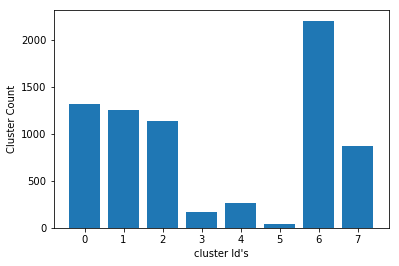

In [13]:
## Plot the the clusternumber vs count of data poinst in each cluster
constructBarGraph(clusterList, 'cluster Id\'s','Cluster Count')

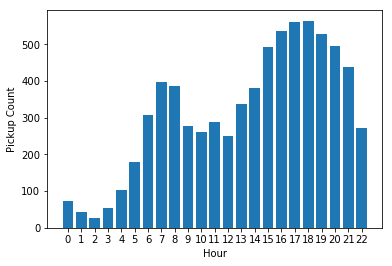

In [14]:
## plot the bar chart for hour of day vs count of pick-up requests for each hour
## Plot the hour list details 
constructBarGraph(hrDayList,'Hour','Pickup Count')

In [15]:
## Group data by cluster number, hour of the day
uberClusterIdHourData = uberFinalData.groupby(['clusterId','hourOfDay'])

In [16]:
## data points in each cluster for each hour
uberClusterIdHourData.size()

clusterId  hourOfDay
0          0             11
           1              7
           2              6
           3              8
           4             15
           5             28
           6             45
           7             54
           8             68
           9             50
           10            45
           11            50
           12            48
           13            74
           14            66
           15            84
           16            95
           17           112
           18           115
           19           113
           20            93
           21            85
           22            47
1          0             13
           1              4
           2              4
           3             10
           4             18
           5             26
           6             48
                       ... 
6          16           211
           17           223
           18           199
           19           169

In [17]:
## Convert the above as a data frame
uberClusterHourFrame = uberClusterIdHourData.size().to_frame()

In [18]:
## Dataframe for the counts in each cluster for each hour
uberClusterHourFrame

0
clusterId hourOfDay     
0         0           11
          1            7
          2            6
          3            8
          4           15
          5           28
          6           45
          7           54
          8           68
          9           50
          10          45
          11          50
          12          48
          13          74
          14          66
          15          84
          16          95
          17         112
          18         115
          19         113
          20          93
          21          85
          22          47
1         0           13
          1            4
          2            4
          3           10
          4           18
          5           26
          6           48
...                  ...
6         16         211
          17         223
          18         199
          19         169
          20         150
          21         140
          22          82
7         0           17
          1            9
          2            7
          3           11
          4           26
          5           40
          6           52
          7           50
          8           50
          9           47
          10          40
          11          37
          12          36
          13          39
          14          42
          15          38
          16          35
          17          44
          18          47
          19          54
          20          68
          21          44
          22          35

[176 rows x 1 columns]

In [19]:
## Stacked bar chart for the above
uberClusterHourFrame.unstack(level=-1).plot(kind='bar', figsize = (10,10))

In [20]:
## Filter the records based on the clusterId 
def drawPlotPerGraph(clusterNo):
    uberData0Rec = uberFinalData[uberFinalData['clusterId']==clusterNo]
    ax = uberData0Rec.groupby(['hourOfDay']).size().to_frame().unstack(level=-1).plot(kind='bar', figsize = (10,10),title='Cluster ' + str(clusterNo)  + ' Hour Of Day Distribution')
    ax.set_xlabel("Hour Of Day")
    ax.set_ylabel("Cluster Count")
    ax.set_xticklabels(range(1,24))
    plt.show()

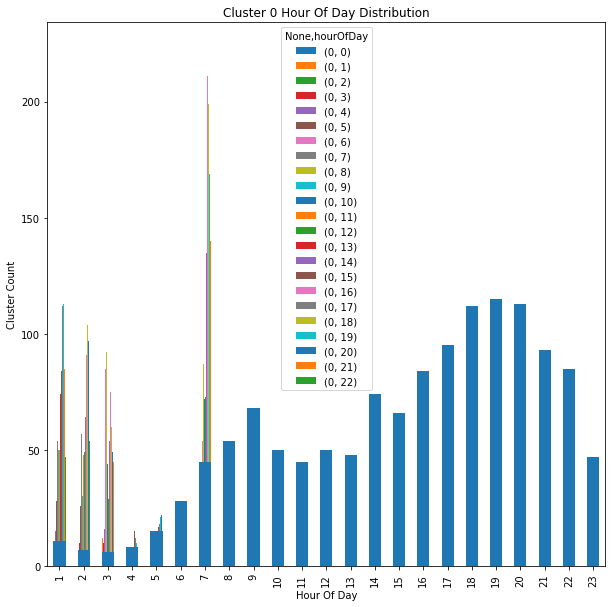

In [21]:
## count for each hour for cluster 0
drawPlotPerGraph(0)

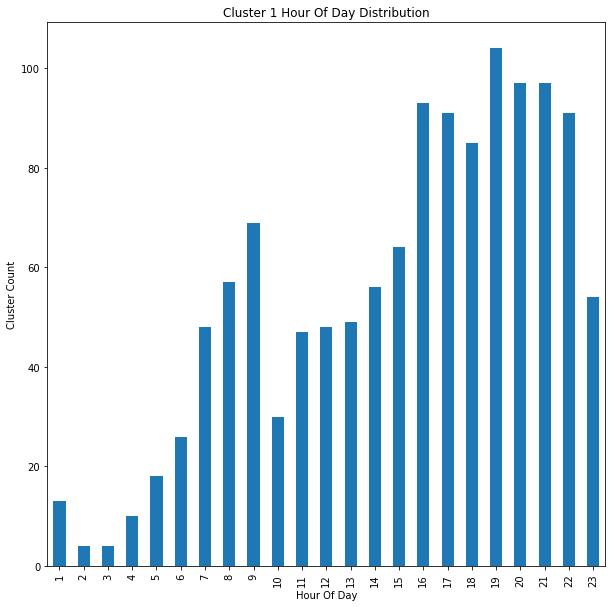

In [22]:
## count for each hour for cluster 1
drawPlotPerGraph(1)

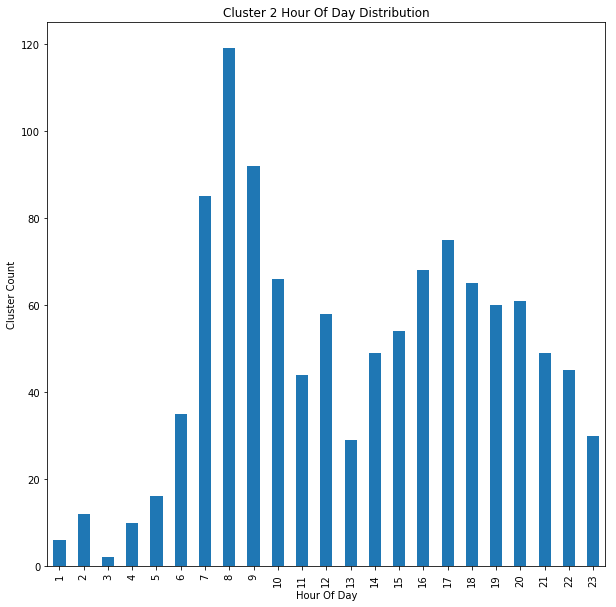

In [23]:
## count for each hour for cluster 2
drawPlotPerGraph(2)

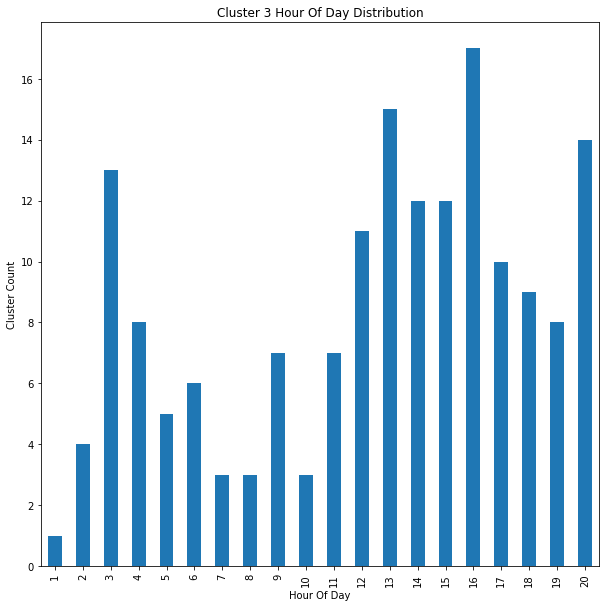

In [24]:
## count for each hour for cluster 3
drawPlotPerGraph(3)

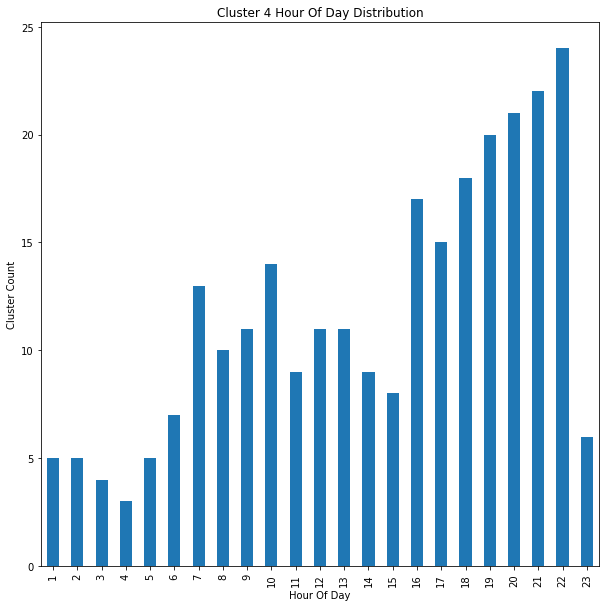

In [25]:
## count for each hour for cluster 4
drawPlotPerGraph(4)

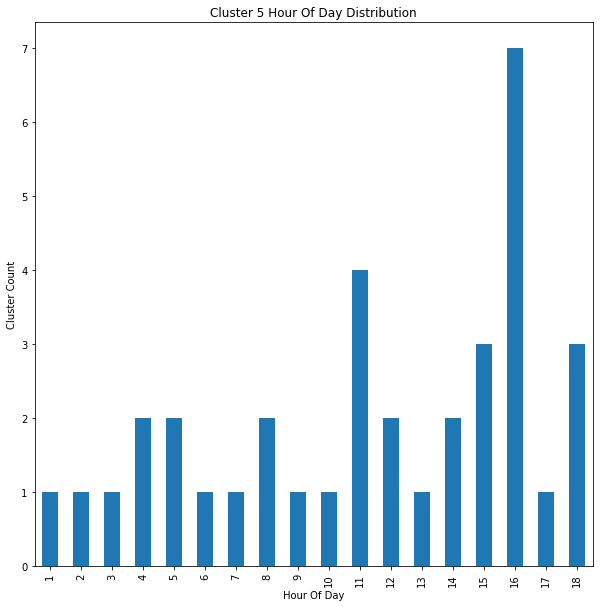

In [26]:
## count for each hour for cluster 5
drawPlotPerGraph(5)

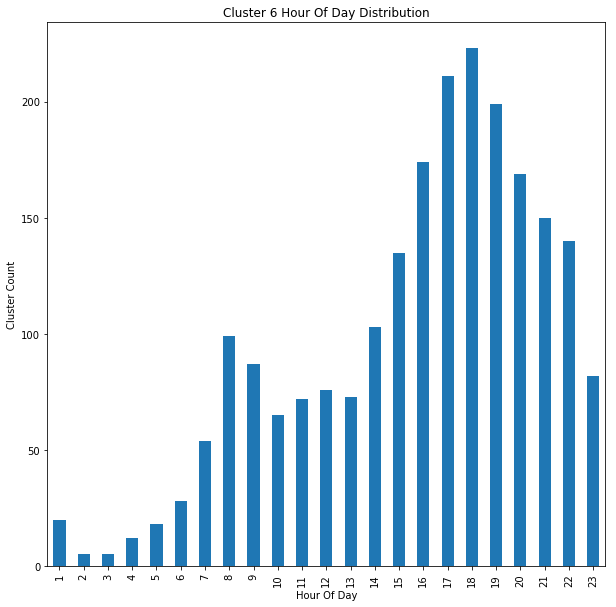

In [27]:
## count for each hour for cluster 6
drawPlotPerGraph(6)

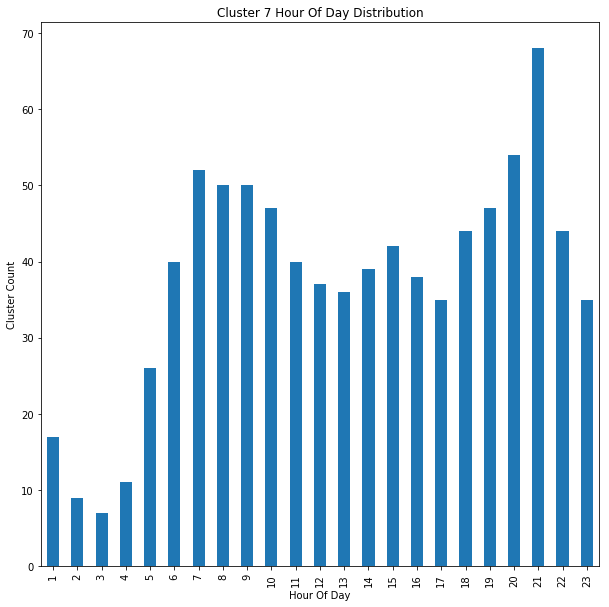

In [28]:
## count for each hour for cluster 7
drawPlotPerGraph(7)